In [2]:
# Modules and data loading
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from pickle_fns import *
import math
from scipy.interpolate import griddata,interp2d
# import mpl_toolkits.mplot3d.art3d.Poly3DCollection

vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
# E,N,data_dfs[0]

In [252]:
vesnos=vesdf['VES No.'].values
locations=['668', '669', '661', '662']
for loc in locations:
    print(list(vesnos).index(loc))

11
12
4
5


In [254]:
# data_dfs[11]
mystr='Profile: 119-128-114-124'
mystr.replace('Profile: ','').split('-')

['119', '128', '114', '124']

In [242]:
#this is to digitize lithologies for better processing. It will be easier to plot them
def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(np.nan)
    return floats
def get_lables(df,lith_dict):
    labels=[]
    for s in df['Interpreted Lithology'].values:
        for i in range(len(lith_dict)):
            if s in lith_dict[i]:
                if i in labels and i!=labels[-1]:
                    labels.append(i*10)
                else:
                    labels.append(i)
                break
    return labels

# np.array(lith_labels).shape
def merge_similar_layers(loc_layer,loc_lith_labels):
    res_layer=[]
    res_label=[]
    for a in np.unique(loc_lith_labels):
        single_layer_prop=0
        if a!=-1:
            single_layer_prop=0
            for n,l in zip(loc_lith_labels,loc_layer):
                if a==n:
                    single_layer_prop += l
            res_layer.append(single_layer_prop)
            res_label.append(a)
    return res_layer,res_label

# for processing purpose at all locations, same number of layers and labels prepared. 
def make_same_numb_layers(master_l_thicknesses,lith_labels):
    layersinlocations=[len(l) for l in master_l_thicknesses]
    maxls=max(layersinlocations)
    j=-1
    for ml in master_l_thicknesses:
        j +=1
        if len(ml)<maxls:
            for i in range(maxls-len(ml)):
                ml.append(0)
                lith_labels[j]=np.append(lith_labels[j],-1)
    loc_layers=np.array(master_l_thicknesses)
    return loc_layers,np.array(lith_labels)

#it is thought that if all the locations have layer thickness information according to sorted layers, it will be lot easier to 
#plot or process the information so the function for sorting single location and creating zero thickness layer for missing 
#layer
def get_sortedlayers4loc(mod_loc_layers,mod_loc_layer_lbls,unique_lbls):
    sorted_loc_layer=[]
    for ul in unique_lbls:
        sorted_loc_layer.append(0)
        for e,l in zip(mod_loc_layers,mod_loc_layer_lbls):
            if l==ul:
                sorted_loc_layer[-1]=e
#     sorted_loc_layer[-1]
    return sorted_loc_layer
def get_depths(thickness_layer_array):
    depths=[]
    d=0    
    for e in thickness_layer_array:
        d += e
        depths.append(d)
    return depths



lith=[]
for df in data_dfs:
#     print(df.iloc[0])
    lith.extend(df['Interpreted Lithology'].values)
# data_dfs[0]
np.unique(np.array(lith)),np.array(lith) # you need to manually separate

#preparation of lith dictionary
fg_undersat=['Fractured Granite, may be under saturation',
        'Fractured granite , may be under saturation',
        'Fractured granite, may be under saturation',
        'Fractured/weathered granite, may be under saturation']
gran= ['Granite',]
hard_gran=['Hard Granite', 'Hard granite', ]
high_weath_gr =['Highly Weathered granite','Highly weathered Granite', 'Highly weathered granite','Soil with kankars/Highly weathered Granite',
        'Soil/Highly weathered Granite',]
soil_w_kankar= ['Overburden/top soil with kankars', 'Soil', 'Soil with kankars', 'Top Soil with kankars',
        'Top soil', 'Top soil with kankars', 'Top soils with kankars',]
weather_gran=[ 'Weathered Granite', 'Weathered granite']
lith_dict={0:soil_w_kankar,1:high_weath_gr,2:weather_gran,3:gran ,4:fg_undersat,5:hard_gran,}


#utilization of get labels
for df in data_dfs:
    df['lith_label']=get_lables(df,lith_dict)    
lith_labels=np.array(df['lith_label'].values)
# lith_labels

#construction of lith labels for layers or thicknesses

np.set_printoptions(precision=3, suppress=True)
master_l_thicknesses=[]
lith_labels=[]
max_strata_thickness=200
for df in data_dfs:
#     print(df['Thickness(m)'].values.astype(np.float))
    layers_values=str_array2floats(df['Thickness(m)'].values)
    lastlayer_thickness=[max_strata_thickness-np.nansum(layers_values) if math.isnan(x) else x for x in layers_values]
    print(lastlayer_thickness)
    master_l_thicknesses.append(lastlayer_thickness)
    lith_labels.append(np.array(df['lith_label'].values))

# layers_values,np.nansum(layers_values),master_l_thicknesses,lith_labels
# with lith dict here most of the layers are repeated.
# And similar layers need to be merged

[1.2073, 3.9215, 2.8793, 191.99189999999999]
[0.22813, 5.4195, 194.35237000000001]
[0.7611, 2.9647, 24.161, 172.11320000000001]
[7.43, 34.837, 157.733]
[2.2159, 7.6227, 190.16140000000001]
[0.21659, 5.3255, 194.45791]
[1.0521, 1.5792, 19.808, 177.5607]
[1.0748, 3.3572, 7.956, 9.6482, 177.96379999999999]
[0.85394, 4.7385, 194.40755999999999]
[1.2233, 5.3119, 12.206, 52.959, 128.2998]
[3.2439, 2.2234, 1.8987, 192.63400000000001]
[1.479, 0.55382, 4.0141, 193.95308]
[1.1016, 0.9276, 197.9708]
[0.67665, 13.799, 8.7875, 55.41, 121.32685000000001]
[0.61273, 0.9985, 6.0469, 19.419, 172.92286999999999]
[0.40463, 4.8876, 87.32, 107.38777]
[0.59517, 9.2831, 21.633, 31.192, 137.29673]
[1.9629, 2.4991, 195.53800000000001]


In [243]:
layers_values,lastlayer_thickness

([1.9629, 2.4991, nan], [1.9629, 2.4991, 195.53800000000001])

In [4]:
#utilization of merge_similar_layers  and make_same_numb_layers functions

mod_layers=[]
mod_layer_lbls=[]
# 
for lyr,lbl in zip(master_l_thicknesses,lith_labels): # changed from loc_layers,lith_labels
    mlyr,mlbl=merge_similar_layers(lyr,lbl)
    mod_layers.append(mlyr)
    mod_layer_lbls.append(mlbl)
mod_layers, mod_layer_lbls 

# final_layers,final_labels=segregate_layers(mod_layers,mod_layer_lbls)
# final_layers,final_labels=make_same_numb_layers(mod_layers,mod_layer_lbls)


#create zero thickness layers for missing layers in each location
mod_layers,mod_layer_lbls
def get_unique_labels(mod_layer_lbls):
    res=[]
    for m in mod_layer_lbls:
        res +=m
    unique_lbls=np.unique(res)
    return unique_lbls
unique_lbls=get_unique_labels(mod_layer_lbls)
final_thicks=[]
for m_llyrs,m_llbls in zip(mod_layers,mod_layer_lbls):
    final_thicks.append(get_sortedlayers4loc(m_llyrs,m_llbls,unique_lbls))
final_thicks

#final depths with default 0 to 5 or 0-10 layers
final_depths=[]
for ft in final_thicks:
    fd = get_depths(ft)
    final_depths.append(fd)
final_depths=np.array(final_depths)
final_thicks=np.array(final_thicks)
# final_depths, final_thicks,unique_lbls      

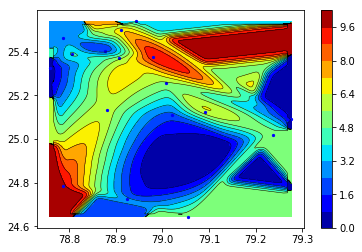

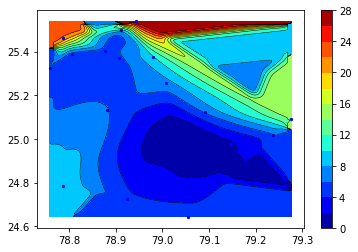

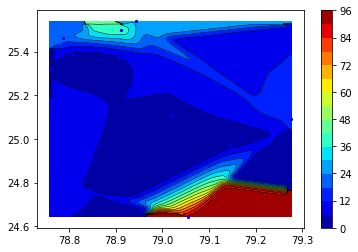

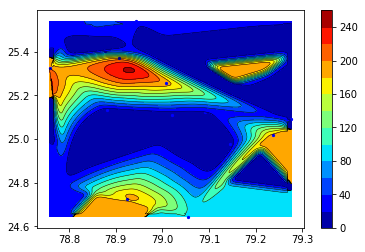

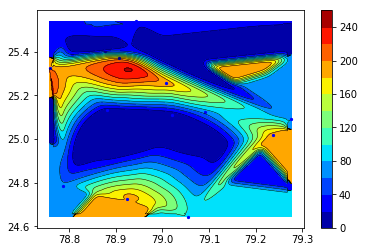

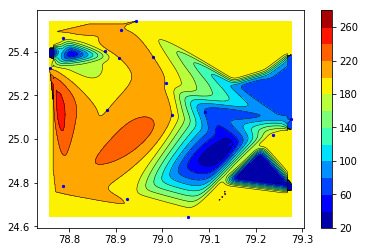

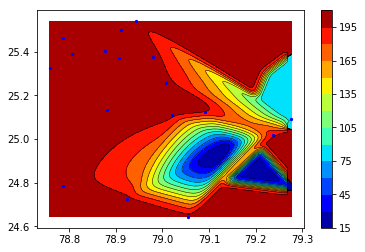

In [5]:
# x,y,dz
from scipy.interpolate import griddata,interp2d
# from scipy.ndimage import zoom
def smoothing(zi,window=(3,3)):
    r,c=zi.shape
    w=np.array((np.array(window)-1)/2,dtype=int)
    res=zi.copy()
    for i in range(w[0],r-w[0]):
        for j in range(w[1],c-w[1]):
            res[i,j]=np.mean(zi[i-w[0]:i+w[0],j-w[1]:j+w[1]])
    return res
def calc_plot_grid(x,y,dz):
    xi = np.linspace(min(x),max(x),100)
    yi = np.linspace(min(y),max(y),100)
    # grid the data.
    zi = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='cubic')
    zi[zi<0]=0
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(x,y,marker='o',c='b',s=5)
def plot_grid(xi,yi,zi):
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    plt.show()

                
np.array(final_depths).T[0]
x=E;y=N
zis=[]
window=(11,11)
bigwindow=(17,17)
xi = np.linspace(min(x),max(x),500)
yi = np.linspace(min(y),max(y),500)
for dz in final_depths.T[:-1]:
    zic = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='cubic')
#     zic=smoothing(zic,window=window);
    zil = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='linear')
#     zil=smoothing(zil,window=window);
    zin = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='nearest')
    zin=smoothing(zin,window=bigwindow);
    zi=(zic+zil)/2

    zi[np.isnan(zi)]=zin[np.isnan(zi)]

    zi=smoothing(zi,window=bigwindow);
    zi=smoothing(zi,window=bigwindow);
    zi[zi<0]=0
    zis.append(zi)    
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(x,y,marker='o',c='b',s=5)
    plt.show()

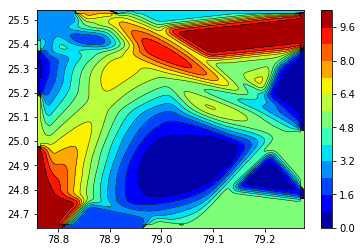

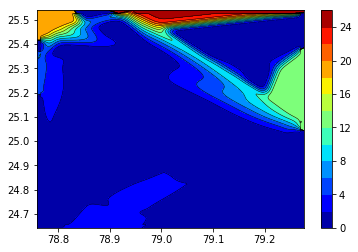

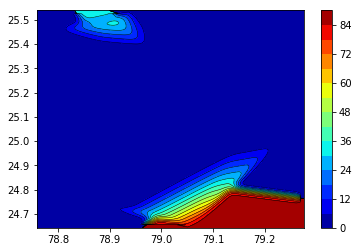

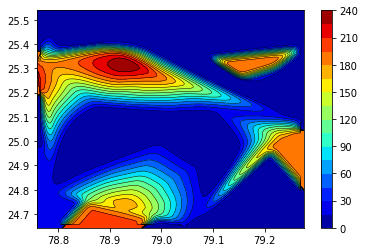

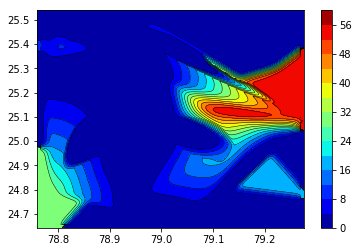

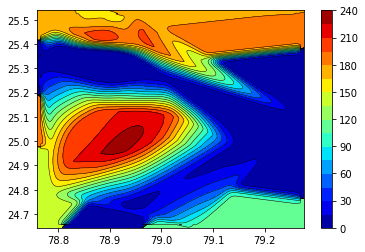

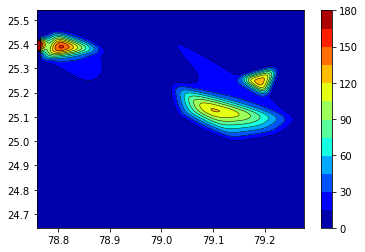

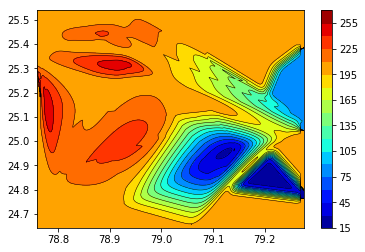

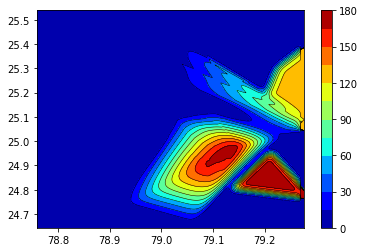

In [6]:
# zis=ozis.copy()
thks=[zis[0].copy()]

plot_grid(xi,yi,zis[0])
for i in range(1,len(zis)):
    thk= zis[i].copy()-zis[i-1].copy()
    thk[thk<0]=0
    thks.append(thk)
    plot_grid(xi,yi,thk)

zr=thks[0].copy()
for z in thks[1:]:
    zr += z.copy()
plot_grid(xi,yi,zr)
thk=max_strata_thickness-zr
thk[thk<0]=0
thks.append(thk)
plot_grid(xi,yi,thk)

In [7]:
layers=np.array(thks)
layers.shape

layers_outfile='tikamgarh_layers.npz'
# ulablesfile='tikamgarh_thck_labels.npy'
np.savez(layers_outfile, unique_lbls,lith_dict,xi,yi,layers)
# np.save(ulablesfile, unique_lbls)

In [8]:
# layers
# yi

In [9]:

def loggify(thicks_of_loc,labels,interval):
    rock_log=[]
    depth_log=[0]
    for layer,label in zip(thicks_of_loc,labels):
        for dt in np.arange(0,layer,interval):
            rock_log.append(label)
            depth_log.append(depth_log[-1]+interval)
#     depth_log=np.arange(0,sum(thicks_of_loc),interval)
    return {'Depth':depth_log[:-1],'Lithology':np.array(rock_log)}
volumelogs=[]
coords=[]
layers=np.array(thks)
nl,r,c=layers.shape
# unique_lbls

final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
# final_lbls
for i in range(r):
    print(i,end=',')
    for j in range(c):
        lyrs=layers[:,i,j]
        volumelogs.append(loggify(lyrs,final_lbls,interval=0.5))
        coords.append([xi[i],yi[j]])
 
        


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [9]:
volumelogs[0]

{'Depth': [0,
  0.5,
  1.0,
  1.5,
  2.0,
  2.5,
  3.0,
  3.5,
  4.0,
  4.5,
  5.0,
  5.5,
  6.0,
  6.5,
  7.0,
  7.5,
  8.0,
  8.5,
  9.0,
  9.5,
  10.0,
  10.5,
  11.0,
  11.5,
  12.0,
  12.5,
  13.0,
  13.5,
  14.0,
  14.5,
  15.0,
  15.5,
  16.0,
  16.5,
  17.0,
  17.5,
  18.0,
  18.5,
  19.0,
  19.5,
  20.0,
  20.5,
  21.0,
  21.5,
  22.0,
  22.5,
  23.0,
  23.5,
  24.0,
  24.5,
  25.0,
  25.5,
  26.0,
  26.5,
  27.0,
  27.5,
  28.0,
  28.5,
  29.0,
  29.5,
  30.0,
  30.5,
  31.0,
  31.5,
  32.0,
  32.5,
  33.0,
  33.5,
  34.0,
  34.5,
  35.0,
  35.5,
  36.0,
  36.5,
  37.0,
  37.5,
  38.0,
  38.5,
  39.0,
  39.5,
  40.0,
  40.5,
  41.0,
  41.5,
  42.0,
  42.5,
  43.0,
  43.5,
  44.0,
  44.5,
  45.0,
  45.5,
  46.0,
  46.5,
  47.0,
  47.5,
  48.0,
  48.5,
  49.0,
  49.5,
  50.0,
  50.5,
  51.0,
  51.5,
  52.0,
  52.5,
  53.0,
  53.5,
  54.0,
  54.5,
  55.0,
  55.5,
  56.0,
  56.5,
  57.0,
  57.5,
  58.0,
  58.5,
  59.0,
  59.5,
  60.0,
  60.5,
  61.0,
  61.5,
  62.0,
  62.5,
  63.

In [10]:
# plt.hist([len(v['Depth']) for v in volumelogs])
# lengths=[len(v['Lithology']) == len(v['Depth']) for v in volumelogs]
def clip_longer_logs(volumelogs):
    lengths=[len(v['Lithology'])  for v in volumelogs]
    ml=min(lengths)
    i=0
    for v in volumelogs:
        i +=1
        v['Depth']=v['Depth'][:ml]
        v['Lithology']=v['Lithology'][:ml]
    return volumelogs

# np.array(xi),sum(lengths)
def getasection(volumelogs,coords,x=78.8):
#     x=78.8
    coords=np.array(coords)
    closeid=np.argmin(abs(coords[:,0]-x),axis=0)
    sec_x=coords[closeid,0]
    # coords[:,0]-x
    x_index=np.where(coords[:,0]==sec_x)[0]
    sec_logs=[]
    for i in x_index:
    #     print(i)
        sec_logs.append(np.array(volumelogs[i]['Lithology'] ))
    return coords[x_index,0],coords[x_index,1],volumelogs[x_index[0]]['Depth'],np.array(sec_logs)
    

In [11]:
# final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
# final_lbls
coords=[]
for i in range(r):
    print(i,end=',')
    for j in range(c):
        lyrs=layers[:,i,j]
        volumelogs.append(loggify(lyrs,unique_lbls,interval=0.5))
        coords.append([xi[i],yi[j]])
volumelogs=clip_longer_logs(volumelogs)



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [12]:
xl,yl,zl,sec_logs=getasection(volumelogs,coords,x=78.8)

# np.savez('xyzlogs.npz',xl,yl,zl,sec_logs)

In [13]:
# npzfile=np.load('xyzlogs.npy.npz')
# xl1=npzfile['arr_0']
# xl1
# ,yl1,zl1,sec_logs1
sec_logs[0]
len(zbs)

NameError: name 'zbs' is not defined

In [ ]:
def get_bound_index(v1darray):
    return np.where(v1darray[:-1] != v1darray[1:])[0]

color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600',}
facies_colors=[color_def[l] for l in color_def]
i=0

polygons=[]
for ul in unique_lbls:
    bounds=[]
    print(ul)
    for j in range(len(sec_logs)):
#         print(j,end=',')
        s=sec_logs[j].copy()
        s[s!=ul]=100 
        zbs=get_bound_index(s)
        if len(zbs)>0:
            if(i==0):
                zs=zl[0],zl[zbs[-1]]
            elif(i==len(unique_lbls)-1):
                zs=zl[zbs[-1]],zl[-1]
            else:
                zs=zl[zbs[0]],zl[-1]
            bounds.append([xl[j],yl[j],zs[0],zs[1],ul])
    polygons.append(np.array(bounds))
    i +=1

In [ ]:
polygons
# k

In [16]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
for k in range(len(polygons)):
    print(k)
    if len(polygons[k])>0:
        x=np.append(polygons[k][:,0],polygons[k][:,0])
        y=np.append(polygons[k][:,1],np.flipud(polygons[k][:,1]))
        z=np.append(polygons[k][:,2],np.flipud(polygons[k][:,3]))

        verts = [list(zip(x, y, z))]
        # print(verts)
        # ax.add_collection3d(Poly3DCollection(verts), zs='z')
        # collection = Poly3DCollection(poly3d, linewidths=1, alpha=0.2)

        collection = Poly3DCollection(verts, linewidths=1, alpha=0.9)
    #     face_color = [0.5, 0.5, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
        collection.set_facecolor(facies_colors[k])
        ax.add_collection3d(collection,zs='z')

# ax.set_xlim((min(x),max(x)))
# ax.set_ylim((min(y),max(y)))
# ax.set_zlim((min(z),max(z)))
ax.set_xlim((min(x),max(x)))
ax.set_ylim((min(y),max(y)))
ax.set_zlim((0,200))
ax.invert_zaxis()
ax.view_init(elev=10., azim=180)
# ax.scatter(x, y, z)
plt.show()       
    

NameError: name 'Axes3D' is not defined

In [17]:
y = [1, 2, 3, 4]
# y.extend(y)
y.extend(reversed(y))
y
x = np.array([0, 0, 0, 0])
y = np.array([1, 2, 3, 4])
z = [0, 0, 0, 0, 1,1,1,1]

# , y.extend(reversed(y)), z
x,y,z
# np.append(x,reversed(y))
np.flipud(y)

array([4, 3, 2, 1])

In [18]:
zbs

array([], dtype=int64)

In [19]:
x=np.append(polygons[0][:,0],polygons[0][:,0])
y=np.append(polygons[0][:,1],np.flipud(polygons[0][:,1]))
z=np.append(polygons[0][:,2],np.flipud(polygons[0][:,3]))

verts = [list(zip(x, y, z))]
# print(verts)
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.add_collection3d(Poly3DCollection(verts), zs='z')
ax.scatter(x, y, z)
plt.show()  

NameError: name 'Axes3D' is not defined

In [20]:
sec_logs
unique_lbls

# sec_logs[1]!=unique_lbls[0]

array([ 0,  1,  2,  3,  4,  5, 30, 50], dtype=int64)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,

(['#CCCCCC', '#FFFF80', '#ACACFF', '#F07800', '#FF99CC', '#B00600'],
 [0, 1, 2, 3, 4, 5, 3, 5])

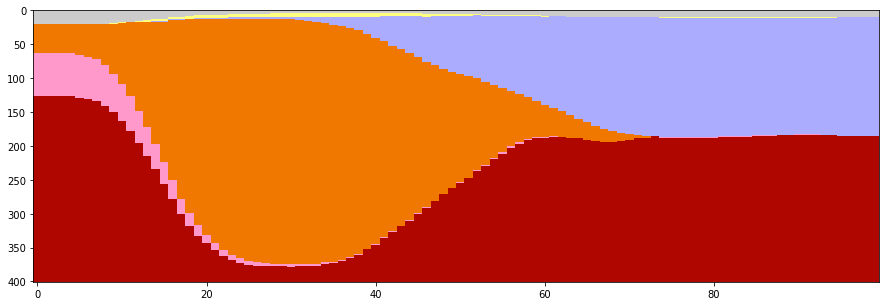

In [21]:
# layers_outfile='tikamgarh_thck_layers.npy'
# ulablesfile='tikamgarh_thck_labels.npy'
# unique_lbls=np.load(ulablesfile)
# layers=np.load(layers_outfile)
final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
# final_lbls
coords=[]
for i in range(r):
    print(i,end=',')
    for j in range(c):
        lyrs=layers[:,i,j]
        volumelogs.append(loggify(lyrs,unique_lbls,interval=0.5))
        coords.append([xi[i],yi[j]])
volumelogs=clip_longer_logs(volumelogs)

xl,yl,zl,sec_logs=getasection(volumelogs,coords,x=78.8)


from matplotlib import gridspec
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 
ax[1] = plt.subplot(gs[1])
color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600'}

lith_label_def={0:'Top soil/w kankar',1:'Highly weath. Granite',2:'Weath. Granite',3:'Granite' ,4:'Und.Sat Frac. Granite',5:'Hard Granite',}
facies_colors=[color_def[l] for l in color_def]
# cluster=np.repeat(np.expand_dims(sec_logs[1],1), 100, 1)
cmap_facies = colors.ListedColormap( facies_colors[0:len(unique_lbls)], 'indexed')
im=ax[1].imshow(sec_logs.T, interpolation='none', aspect='auto',
                        cmap=cmap_facies,vmin=0,vmax=6)
facies_colors,final_lbls

In [24]:
sec_logs.T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5]], dtype=int64)

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
def cross_section_plot(sec_logs,yl):
    color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
               'frac_granite':'#FF99CC','hard_granite':'#B00600'} #,'agranite':'#AF99Cd','final_granite':'#B006A0'
    final_lbls,unique_lbls
    lith_label_def={0:'Top soil/w kankar',1:'Highly weath. Granite',2:'Weath. Granite',3:'Granite' ,4:'Und.Sat Frac. Granite',5:'Hard Granite',}
    facies_colors=[color_def[l] for l in color_def]
    facies_labels=[lith_label_def[l] for l in lith_label_def]
    # facies_colors[0:len(final_lbls)],facies_colors[0:len(unique_lbls)],len(final_lbls),len(unique_lbls),final_lbls,unique_lbls
    f,ax=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1]) 
    ax[0] = plt.subplot(gs[0])
    ax[1] = plt.subplot(gs[1])
    # cmap_facies = colors.ListedColormap( np.array(facies_colors)[final_lbls], 'indexed')
    cmap_facies = colors.ListedColormap( facies_colors[0:len(unique_lbls)], 'indexed')
    im=ax[0].imshow(sec_logs.T, interpolation='none', aspect='auto',
                            cmap=cmap_facies,vmin=0,vmax=6)
    trc_space=(max(yl)-min(yl))/len(sec_logs)
    tentrcspace=trc_space*10

    xticks=np.arange(min(yl),max(yl),tentrcspace)
    ind=np.arange(0,len(sec_logs),10)
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(xticks)

    # ax[0].set_xticks(ind)
    ax[0].set_yticklabels(np.arange(-25,200,25))
    # ax[0].set_xlim(min(yl),max(yl))
    divider = make_axes_locatable(ax[-1])
    # ax[1].set_ticklabels('')
    ax[-1].axis('off')
    cax = divider.append_axes("right", size="1%", pad=0.5)
    cbar=plt.colorbar(im, cax=cax)
    #     cbar.set_label((11*' ').join(facies_labels[::-1]))
    cbar.set_ticks(np.arange(0.5,6,1)); 
    # cbar.ax.set_xticklabels('')
    cbar.ax.invert_yaxis() 
    cbar.ax.set_yticklabels(facies_labels)
print('this')
# f.suptitle('Location: %s'%fig_name[:-4], fontsize=14,y=0.94)
# f.savefig(fig_name)

this


In [306]:
len(sec_logs)
# trc_space=(max(yl)-min(yl))/len(sec_logs)
# tentrcspace=trc_space*10
# tentrcspace

100

In [287]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
# np.avolumelogs[0]['Lithology']
# x_index,sec_logs
# x=coords[:,1]
# y=coords[:,1]
z1=np.array(volumelogs[800]['Depth'])
# sec_logs[1]

# domains
x = np.logspace(-1.,np.log10(5),60) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z=np.outer(z.T,z)
X, Y = np.meshgrid(x, y)    # 50x50

# Z = np.outer(np.ones((len(z1),)), z1)        # 50x50
# X, Y = np.meshgrid(xi, yi)    # 50x50

In [288]:
# np.outer(z.T, z)  , np.outer(np.ones((len(z1),)), z1)
# xi,yi
X.shape, Z.shape,Y.shape

((50, 60), (50, 50), (50, 60))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

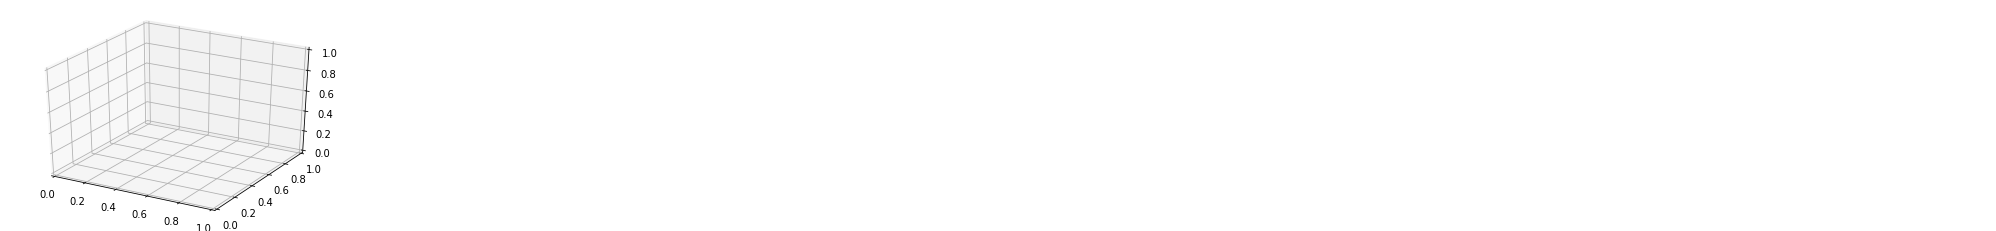

In [289]:
# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = X # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
xi,yi

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(xi, yi)

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
cset = ax2.contourf(X, Y, data, 100, zdir='z', offset=0.5, cmap=cm.BrBG)

ax2.set_zlim((0.,1.))

plt.colorbar(cset)
plt.show()

D:\adiarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead


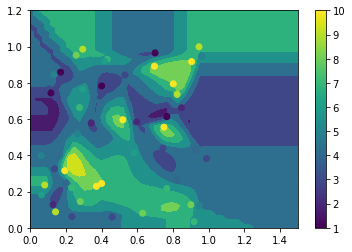

In [290]:
import numpy as np
import scipy
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def extrapolate_nans(x, y, v):
    '''  
    Extrapolate the NaNs or masked values in a grid INPLACE using nearest
    value.

    .. warning:: Replaces the NaN or masked values of the original array!

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.

    Returns:

    * v : 1D array
        The array with NaNs or masked values extrapolated.
    '''

    if np.ma.is_masked(v):
        nans = v.mask
    else:
        nans = np.isnan(v)
    notnans = np.logical_not(nans)
    v[nans] = scipy.interpolate.griddata((x[notnans], y[notnans]), v[notnans],
        (x[nans], y[nans]), method='nearest').ravel()
    return v


grid_x, grid_y = np.mgrid[0:1.5:50j, 0:1.2:50j]
points = np.random.rand(50, 2)
values = np.random.random_integers(1,10,50)

x = [] 
y = []
for i in points:
    x.append(i[0])
    y.append(i[1])
n = plt.Normalize(values.min(), values.max())


grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')
extrapolate_nans(grid_x,grid_y,grid_z)
plt.contourf(grid_x,grid_y,grid_z)
plt.scatter(x,y,c=values)
plt.colorbar()

plt.show()

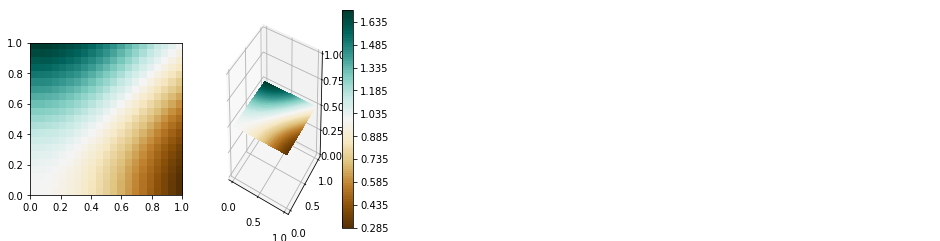

In [291]:
# xi.shape,zi.shape
# # plot_grid(xi,yi,zis[0])
# window=np.array((3,3))
# window-1
# w=np.array((np.array(window)-1)/2,dtype=int)
# w
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,1,21), np.linspace(0,1,21))

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
cset = ax2.contourf(X, Y, data, 100, zdir='z', offset=0.5, cmap=cm.BrBG)

ax2.set_zlim((0.,1.))

plt.colorbar(cset)
plt.show()

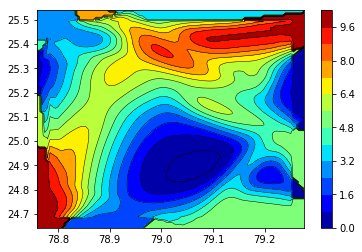

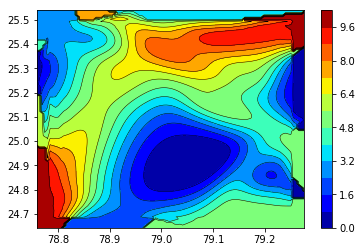

In [292]:
zis[0]

plot_grid(xi,yi,zis[0])
plot_grid(xi,yi,smoothing(zis[0],window=(11,11)))

In [293]:
# for f in final_thicks.T:
    
#     print(f)


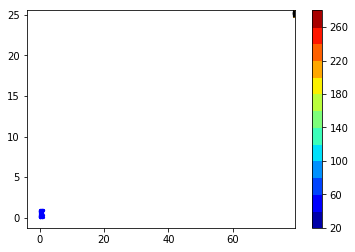

In [294]:
# zr=zis[0]
# for z in zis[1:]:
#     zr += z

CS = plt.contour(xi,yi,zr,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zr,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5)
plt.show()

In [295]:
zis[0]

array([[ 9.878,  9.878,  9.878, ...,  5.292,  5.292,  5.292],
       [ 9.878,  9.878,  9.878, ...,  5.292,  5.292,  5.292],
       [ 9.878,  9.878,  9.878, ...,  5.292,  5.292,  5.292],
       ..., 
       [ 2.631,  2.631,  2.631, ...,  9.839,  9.839,  9.839],
       [ 2.631,  2.631,  2.631, ...,  3.726,  3.726,  9.839],
       [ 2.631,  2.631,  2.631, ...,  3.726,  3.726,  3.726]])

In [296]:
# dd=lith_labels[2]
# ab=np.unique(dd)

                
        
    

In [297]:
# this is to get the sum of appearance of each layer type
def get_num(inp,comp_num):
    if inp==comp_num: return True
sum_of_types=[0,0,0,0,0,0]
for i in np.array(lith_labels).ravel():
        for j in get_unique_labels(lith_labels):
            if(get_num(i,j)): 
                sum_of_types[j] +=1 
                break
        
sum_of_types        

ValueError: operands could not be broadcast together with shapes (0,) (4,) 

In [ ]:
lith_dict

In [ ]:
# loc_layers.T
# vesdf.Location.values
# lith_labels[1].append(-1)
np.sum(loc_layers.T,axis=0)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
thick_fact=0.02

x,y = vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
# dz=loc_layers.T[0]

style.use('ggplot')
colors=['r','green','blue','y','m','k','aqua']
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111, projection='3d')

# x3 = [1,2,3,4,5,6,7,8,9,10]
# y3 = [5,6,7,8,2,5,6,3,7,2]
z = np.zeros(len(x))

dx = thick_fact*np.ones(len(x))
dy = thick_fact*np.ones(len(x))
# dz = [1,2,3,4,5,6,7,8,9,10]

# x31 = [1,2,3,4,5,6,7,8,9,10]
# y31 = [5,6,7,8,2,5,6,3,7,2]
# z31 = np.zeros(10)+dz

p=[]
layers=final_thicks.T.copy()
dz= layers[0].copy()
ax1.bar3d(x, y, z, dx, dy, dz,color=colors[0])
for i in range(1,6): #len(layers)+1
    z +=layers[i-1] 
    dz= layers[i].copy()
    ax1.bar3d(x, y, z, dx, dy, dz,color=colors[i])
       
    print(z[-5:])
#     try:
        
#     except:
#         pass



ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
# ax1.invert_zaxis()
angle=45
ax1.view_init(190, angle)
ax1.set_zlim(0,200)

# patterns = (  '*', 'o', 'O', '.','+', 'x')
# # patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.',
# #             '-', '+', 'x', '\\', '*', 'o', 'O')
# for bar, pattern in zip(p, patterns):
#     bar.set_hatch(pattern)
# ax1.legend(bars, layers,loc=4)
ax1.grid(True)
plt.show()

In [ ]:
min(x),max(x)
# xi = np.linspace(-2.1,2.1,100)
# yi = np.linspace(-2.1,2.1,100)
# xi,yi
layers

In [17]:
data_dfs[0]

,Layer No.,Resistivity(Ωm),Thickness(m),Depth (m),Elev.,Interpreted Lithology,lith_label
0,1,11.127,1.2073,1.2073,211.79,Top soil with kankars,0
1,2,61.666,3.9215,5.1288,207.87,Soil with kankars/Highly weathered Granite,1
2,3,142.60,2.8793,8.0081,204.99,Weathered Granite,2
3,4,4345.7,--,--,--,Hard granite,5


[ 1.207  0.228  3.726  7.43 ]


IndexError: list index out of range

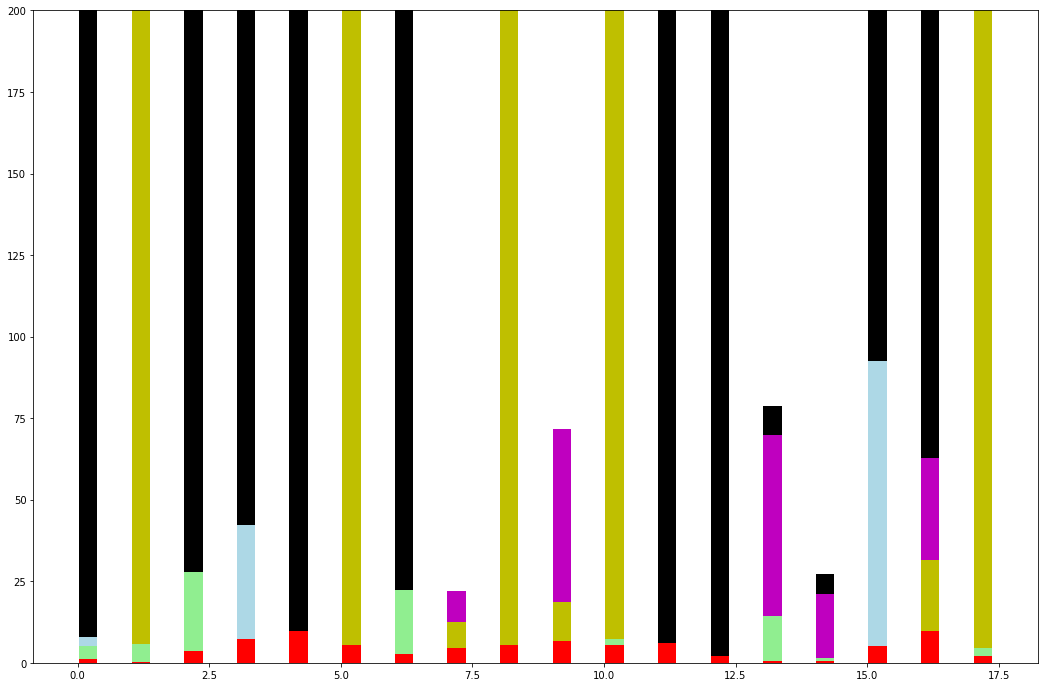

In [14]:
# menMeans = np.array([[20, 35, 30, 35, 27],
#                      [25, 32, 34, 20, 25],
#                      [21, 37, 30, 15, 5]])
# locations=['G13454', 'G2', 'G3', 'G4', 'G5']

menMeans=final_thicks.T.copy()
locations=vesdf.Location.values
print(menMeans[0][:4])
layers=['layer1', 'layer2','layer3','layer4','layer5']
colors=['r','lightgreen','lightblue','y','m','k']
_,N = menMeans.shape
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
# p1=[]
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
bottom=menMeans[0].copy()
# p1.append(ax.bar(ind+0.2, menMeans[0], width,color=colors[0]))
# for i in range(1,len(menMeans)):    
#     p1.append(ax.bar(ind+0.2, menMeans[i], width,bottom=bottom,color=colors[i] ))
#     bottom += menMeans[i]
p1=ax.bar(ind+0.2, menMeans[0], width,color=colors[0],ecolor='black')
for i in range(1,len(menMeans)):    
    p1 += ax.bar(ind+0.2, menMeans[i], width,bottom=bottom,color=colors[i] ,ecolor='black')
    bottom += menMeans[i]

print(menMeans[0][:4])
patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.',
            '-', '+', 'x', '\\', '*', 'o', 'O')
patterns = np.array(['.', '*', '\\','o', 'O']*len(locations))
patterns=patterns.reshape(len(locations),len(layers))

# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.','+', 'x')
# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.',
#             '-', '+', 'x', '\\', '*', 'o', 'O')
for bar, pattern in zip(p1, patterns.T.ravel()):
    bar.set_hatch(pattern)
ax.set_ylabel('Depth')
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind+0.2+width/2, minor=False)
ax.set_xticklabels( locations, minor=False)
ax.xaxis.tick_top()
ax.set_ylim(0,210)
# ax.set_yticks(np.arange(0, max(bottom), 10))
# ax.legend(p1, layers,loc=4)
ax.invert_yaxis()
# ax.titlepad=300
plt.title('Scores by group and gender',y=1.01)
plt.show()

In [ ]:
loc_layers.T[1]

In [18]:
data_dfs[1]

,Layer No.,Resistivity(Ωm),Thickness(m),Depth (m),Elev.,Interpreted Lithology,lith_label
0,1,12.864,0.22813,0.22813,229.77,Top soil,0
1,2,94.038,5.4195,5.6476,224.35,Highly weathered granite,1
2,3,9546.4,--,--,--,Granite,3


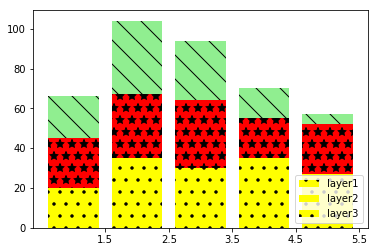

In [15]:
fig = plt.figure()
# ax1 = fig.add_subplot(131)
# ax1.bar(range(1, 5), range(1, 5), color='red', edgecolor='black', hatch="/")
# ax1.bar(range(1, 5), [6] * 4, bottom=range(1, 5), color='blue', edgecolor='black', hatch='//')
# ax1.set_xticks([1.5, 2.5, 3.5, 4.5])
menMeans = np.array([[20, 35, 30, 35, 27],
                     [25, 32, 34, 20, 25],
                     [21, 37, 30, 15, 5]])
locations=['G13454', 'G2', 'G3', 'G4', 'G5']
layers=['layer1', 'layer2','layer3']

ax = fig.add_subplot(111)
colors=['yellow','r','lightgreen','lightblue','y','m','k']

bars = ax.bar(range(1, 6), menMeans[0], color=colors[0], ecolor='black')
bottom =menMeans[0]
for i in range(1,len(menMeans)):
    bars +=    ax.bar(range(1, 6),  menMeans[i], bottom= menMeans[0], color=colors[i], ecolor='black')
    bottom +=menMeans[i]
ax.set_xticks([1.5, 2.5, 3.5, 4.5,5.5])
patterns = np.array(['.', '*', '\\']*5)
patterns=patterns.reshape(5,3)

# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.','+', 'x')
# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.',
#             '-', '+', 'x', '\\', '*', 'o', 'O')
for bar, pattern in zip(bars, patterns.T.ravel()):
    bar.set_hatch(pattern)
ax.legend(bars, layers,loc=4)
# bars

In [244]:
def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(np.nan)
    return floats
str_array2floats(vesdf.RL.values)
def make_same_numb_layers(master_l_thicknesses,lith_labels):
    layersinlocations=[len(l) for l in master_l_thicknesses]
    maxls=max(layersinlocations)
    j=-1
    for ml in master_l_thicknesses:
        j +=1
        if len(ml)<maxls:
            for i in range(maxls-len(ml)):
                ml.append(0)
                lith_labels[j]=np.append(lith_labels[j],-1)
    loc_layers=np.array(master_l_thicknesses)
    return loc_layers,np.array(lith_labels)
np.set_printoptions(precision=3, suppress=True)
master_l_thicknesses=[]
lith_labels=[]
liths=[]
max_strata_thickness=300
for df in data_dfs:
#     print(df['Thickness(m)'].values.astype(np.float))
    layers_values=str_array2floats(df['Thickness(m)'].values)
    lastlayer_thickness=[max_strata_thickness-np.nansum(layers_values) if math.isnan(x) else x for x in layers_values]
#     print(lastlayer_thickness)
    master_l_thicknesses.append(lastlayer_thickness)
    lith_labels.append(np.array(df['lith_label'].values))
    liths.append(np.array(df['Interpreted Lithology'].values))
elevations=str_array2floats(vesdf.RL.values)

In [246]:
make_same_numb_layers(master_l_thicknesses,lith_labels)

(array([[   1.207,    3.921,    2.879,  291.992,    0.   ],
        [   0.228,    5.42 ,  294.352,    0.   ,    0.   ],
        [   0.761,    2.965,   24.161,  272.113,    0.   ],
        [   7.43 ,   34.837,  257.733,    0.   ,    0.   ],
        [   2.216,    7.623,  290.161,    0.   ,    0.   ],
        [   0.217,    5.325,  294.458,    0.   ,    0.   ],
        [   1.052,    1.579,   19.808,  277.561,    0.   ],
        [   1.075,    3.357,    7.956,    9.648,  277.964],
        [   0.854,    4.739,  294.408,    0.   ,    0.   ],
        [   1.223,    5.312,   12.206,   52.959,  228.3  ],
        [   3.244,    2.223,    1.899,  292.634,    0.   ],
        [   1.479,    0.554,    4.014,  293.953,    0.   ],
        [   1.102,    0.928,  297.971,    0.   ,    0.   ],
        [   0.677,   13.799,    8.787,   55.41 ,  221.327],
        [   0.613,    0.999,    6.047,   19.419,  272.923],
        [   0.405,    4.888,   87.32 ,  207.388,    0.   ],
        [   0.595,    9.283,   21.633,  

In [154]:
# elevations
# # depths=
# master_l_ele_depths=np.cumsum(master_l_thicknesses,axis=1)-np.array(elevations).reshape(len(elevations),1)
# master_l_ele_depths.T[:,0:4]
ths=np.array(master_l_thicknesses).T
lss=liths[0:4]
eles=np.array(elevations)[:4]
eles,ths
liths[0:4]

[array(['Top soil with kankars',
        'Soil with kankars/Highly weathered Granite', 'Weathered Granite',
        'Hard granite'], dtype=object),
 array(['Top soil', 'Highly weathered granite', 'Granite'], dtype=object),
 array(['Top soils with kankars', 'Top soils with kankars',
        'Highly weathered granite', 'Hard granite'], dtype=object),
 array(['Top soil', 'Weathered granite', 'Hard granite'], dtype=object)]

In [126]:
lss[0]

array(['Top soil with kankars',
       'Soil with kankars/Highly weathered Granite', 'Weathered Granite',
       'Hard granite'], dtype=object)

In [174]:
len(np.append(-eles,ths[0:nlocs].T))
nlayers,nlocs

(19, 4)

In [169]:
np.array(elevations)[0:nlocs]
len(np.append(-eles,ths[0:nlocs]))/4
ths.shape[0]
ths[0:nlocs]
ths[0:4].T

array([[   1.207,    0.228,    0.761,    7.43 ],
       [   3.921,    5.42 ,    2.965,   34.837],
       [   2.879,  294.352,   24.161,  257.733],
       [ 291.992,    0.   ,  272.113,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ]])

In [200]:
colors,lith_labels
i=3
int(i/10) or int(i%10)
ths=np.array(master_l_thicknesses)
ths.shape
nlocs=4
nlayers=ths.shape[1]+1
eles=np.array(elevations)[0:nlocs]
vess=np.append(-eles,ths[0:nlocs].T).reshape(nlayers,nlocs)
colors=['grey','lightgreen','lightblue','y','m','k']
fcolors=colors[0:nlayers]
vess
lss=np.array(liths[0:nlocs])
lbs=np.array(lith_labels[0:nlocs])
lbs

array([[ 0,  1,  2,  5, -1],
       [ 0,  1,  3, -1, -1],
       [ 0,  0,  1,  5, -1],
       [ 0,  2,  5, -1, -1]], dtype=int64)

In [220]:
lbs[0],vess[0],lss[0],len(menMeans)
i=0
int(i/10) or int(i%10)
onelbs[j-1],int(-9/10),int(-9%10)

(-1, 0, 1)

In [245]:
# menMeans = vess.copy()
# menMeans.T[0],lbs
# onevess[5],onelbs,int(onelbs[j-1]/10) or int(onelbs[j-1]%10), onelbs[j-1] if onelbs[j-1]<10 else int(onelbs[j-1]/10)
# # fcolors[int(onelbs[j-1]/10) or int(onelbs[j-1]%10)]
# vess[0,:]
# lss,vess.T,x_coords
thicks,labels=make_same_numb_layers(master_l_thicknesses,lith_labels)

In [248]:
df

,Layer No.,Resistivity(Ωm),Thickness(m),Depth (m),Elev.,Interpreted Lithology,lith_label
0,1,11.819,1.9629,1.9629,225.04,Soil,0
1,2,34.984,2.4991,4.4620,222.54,Highly Weathered granite,1
2,3,4487.5,--,--,--,Granite,3


0.375 -213.0
0.375 -211.7927
0.375 -207.8712
0.375 -204.9919
1.375 -230.0
1.375 -229.77187
1.375 -224.35237
2.375 -181.0
2.375 -180.2389
2.375 -177.2742
2.375 -153.1132
3.375 -191.0
3.375 -183.57
3.375 -148.733


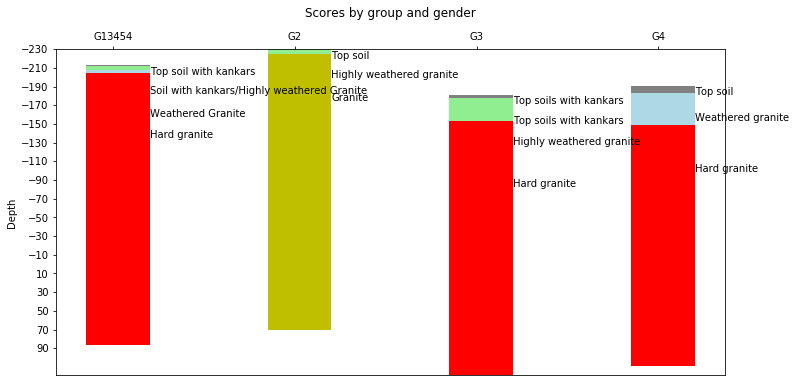

In [237]:
# master_l_thicknesses,lith_labels
# thicks,labels=make_same_numb_layers(master_l_thicknesses,lith_labels)
# liths
ths=np.array(master_l_thicknesses)

nlocs=4
nlayers=ths.shape[1]+1
eles=np.array(elevations)[0:nlocs]
vess=np.append(-eles,ths[0:nlocs].T).reshape(nlayers,nlocs)
colors=['grey','lightgreen','lightblue','y','m','r']
fcolors=colors[0:nlayers]
vess
lss=np.array(liths[0:nlocs])
lbs=np.array(lith_labels[0:nlocs])

menMeans = vess.copy()
locations=['G13454', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9','G13454', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9']

_,N = menMeans.shape
inds = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1=[]
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

bottom=menMeans[0]

for i in range(nlocs):
#     i=0
    onevess=menMeans.T[i]
    onelbs=lbs[i]
    ind=inds[i]
    p1.append(ax.bar(ind+0.2,onevess[0], width,color=fcolors[int(onelbs[0]/10) or int(onelbs[0]%10)] ,ecolor='black'))
    bottom = onevess[0]
    for j in range(1,nlayers): 
        p1.append(ax.bar(ind+0.2,onevess[j], width,bottom=bottom,color=fcolors[onelbs[j-1] if onelbs[j-1]<10 else int(onelbs[j-1]/10)]))
        bottom += onevess[j]


patterns = ['-', '+', 'x', '\\', '*', 'o', 'O', '.',
            '-', '+', 'x', '\\', '*', 'o', 'O']
nlayers,nlocs=vess.shape

patterns = np.array(patterns[0:nlayers]*nlocs)
patterns=patterns.reshape(nlocs,nlayers)

# for bar, pattern in zip(p1, patterns.T.ravel()):
#     bar.set_hatch(pattern)
ax.set_ylabel('Depth')
# ax.set_title('Scores by group and gender')
ax.set_xticks(inds+0.0+width/2, minor=False)
ax.set_xticklabels( locations, minor=False)
ax.xaxis.tick_top()
x_coords=inds+0.2+width/2

for ls,vs,xc in zip(lss,vess.T,x_coords):
    cvs=np.cumsum(vs)
#     print(vs,cvs)
    adder=10
    for i in range(len(ls)):        
        ax.annotate(ls[i], xy=(xc, cvs[i]+ adder))
        adder+=20
        print(xc, cvs[i])
ax.set_yticks(np.arange(min(vess[0,:]), bottom, 20))
# ax.legend(p1, layers,loc=4)
ax.invert_yaxis()
# ax.titlepad=300
plt.title('Scores by group and gender',y=1.08)
plt.show()

In [233]:
ind+0.0+width/2
vess.shape
for ls,vs in zip(lss,vess):
#     for i in range(len(ls)):
    print(vs)

[-213. -230. -181. -191.]
[ 1.207  0.228  0.761  7.43 ]
[  3.921   5.42    2.965  34.837]
[   2.879  294.352   24.161  257.733]


In [108]:


# for df,loc in zip(data_dfs,str_array2floats(vesdf.RL.values)):
#     print(df['Depth (m)'])
vess,min(vess[0,:])

(array([[  87.   ,   70.   ,  119.   ,  109.   ],
        [   1.207,    0.228,    0.761,    7.43 ],
        [   3.921,    5.42 ,    2.965,   34.837],
        [   2.879,  294.352,   24.161,  257.733],
        [ 291.992,    0.   ,  272.113,    0.   ],
        [   0.   ,    0.   ,    0.   ,    0.   ]]), 70.0)

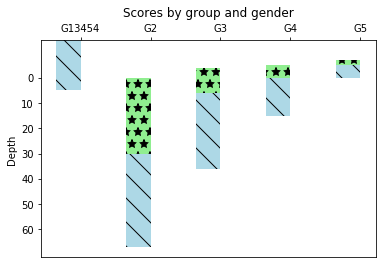

In [62]:
menMeans = np.array([[-10, 0, -4, -5, -7],
                     [-5, 30, 10, 5, 2],
                     [20, 37, 30, 15, 5]])
locations=['G13454', 'G2', 'G3', 'G4', 'G5']
layers=['layer1', 'layer2','layer3']
colors=['r','lightgreen','lightblue','y','m','k']
_,N = menMeans.shape
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
# p1=[]
fig = plt.figure()
ax = fig.add_subplot(111)

bottom=menMeans[0]
p1=ax.bar(ind+0.2, menMeans[0], width,color=colors[0],ecolor='black')
for i in range(1,len(menMeans)):    
    p1 += ax.bar(ind+0.2, menMeans[i], width,bottom=bottom,color=colors[i] ,ecolor='black')
    bottom += menMeans[i]
patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.',
            '-', '+', 'x', '\\', '*', 'o', 'O')
patterns = np.array(['.', '*', '\\']*5)
patterns=patterns.reshape(5,3)
for bar, pattern in zip(p1, patterns.T.ravel()):
    bar.set_hatch(pattern)
ax.set_ylabel('Depth')
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind+0.2+width/2, minor=False)
ax.set_xticklabels( locations, minor=False)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(0, max(bottom), 10))
ax.invert_yaxis()
plt.title('Scores by group and gender',y=1.08)
plt.show()

In [298]:
p1[0]

NameError: name 'p1' is not defined

ValueError: incompatible sizes: argument 'height' must be length 2 or scalar

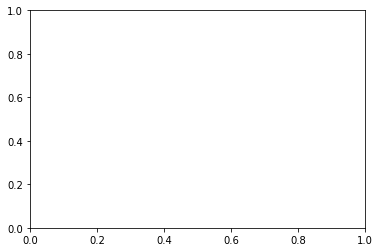

In [58]:
N = 2
Means = [20,25,32]
Stds = [10,22,38]

Std = [2,3]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p=[]
p.append( plt.bar(ind, Means[0], width))
bottom=0
for i in range(1,len(Means)):
    bottom += Means[i-1]
    p.append( plt.bar(ind, Means[i], width, bottom = bottom))
    
# p.append(plt.bar(ind, Means[1], width, bottom=Means[0]))
# ps=(p[i] for i in range(len(p)))
persons=['Men', 'Women','middle']

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1'))
plt.yticks(np.arange(0, 81, 10))


plt.legend(p, persons)

plt.show()